In [ ]:
# !pip install keras

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

# Đọc dữ liệu từ file
url = 'sample_data/plants.data'  #https://archive.ics.uci.edu/dataset/180/plants
with open(url, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Tiền xử lý dữ liệu
cleaned_data = [line.replace('×', 'x').strip().split(',') for line in lines]
# Tách tên loài và các bang
species = [row[0] for row in cleaned_data]
states = [row[1:] for row in cleaned_data]

# Sử dụng MultiLabelBinarizer để chuyển đổi các bang thành ma trận nhị phân
mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(states)

# Tạo DataFrame để dễ thao tác
df = pd.DataFrame(binary_matrix, columns=mlb.classes_, index=species)
print(df.head())
# Lấy ngẫu nhiên 1000 dòng từ df và đưa vào df_tmp
# df_tmp = df.sample(n=10000, random_state=42)  # random_state=42 để đảm bảo kết quả ngẫu nhiên có thể lặp lại (tùy chọn)
# print(df_tmp.head())


                        ab  ak  al  ar  az  bc  ca  co  ct  dc  ...  tx  ut  \
abelia                   0   0   0   0   0   0   0   0   0   0  ...   0   0   
abelia x grandiflora     0   0   0   0   0   0   0   0   0   0  ...   0   0   
abelmoschus              0   0   0   0   0   0   0   0   1   1  ...   0   0   
abelmoschus esculentus   0   0   0   0   0   0   0   0   1   1  ...   0   0   
abelmoschus moschatus    0   0   0   0   0   0   0   0   0   0  ...   0   0   

                        va  vi  vt  wa  wi  wv  wy  yt  
abelia                   0   0   0   0   0   0   0   0  
abelia x grandiflora     0   0   0   0   0   0   0   0  
abelmoschus              1   1   0   0   0   0   0   0  
abelmoschus esculentus   1   1   0   0   0   0   0   0  
abelmoschus moschatus    0   0   0   0   0   0   0   0  

[5 rows x 70 columns]


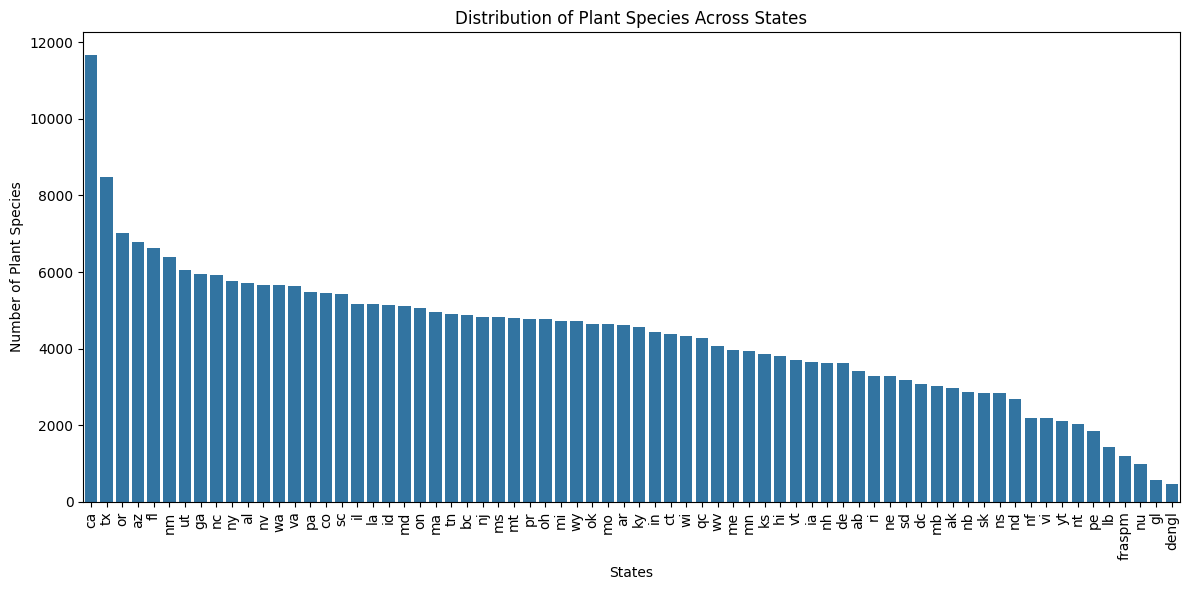

<ipython-input-2-787be7a63f2c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


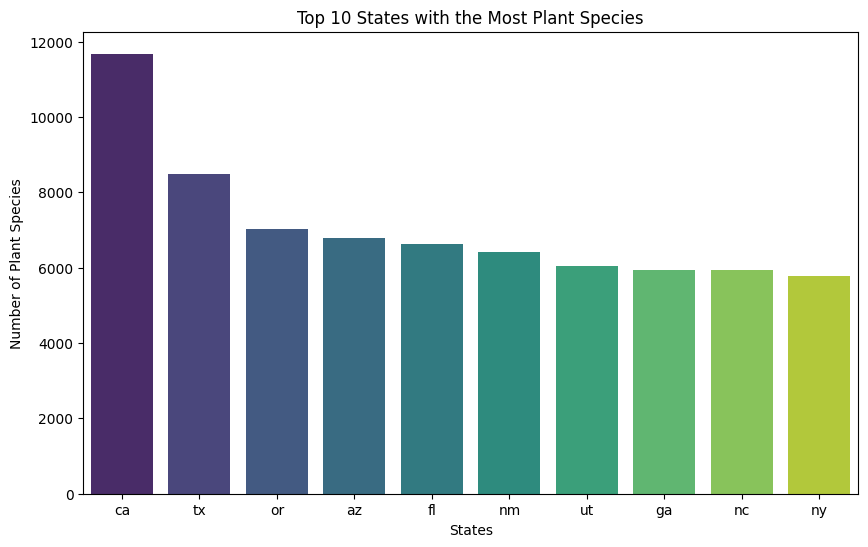

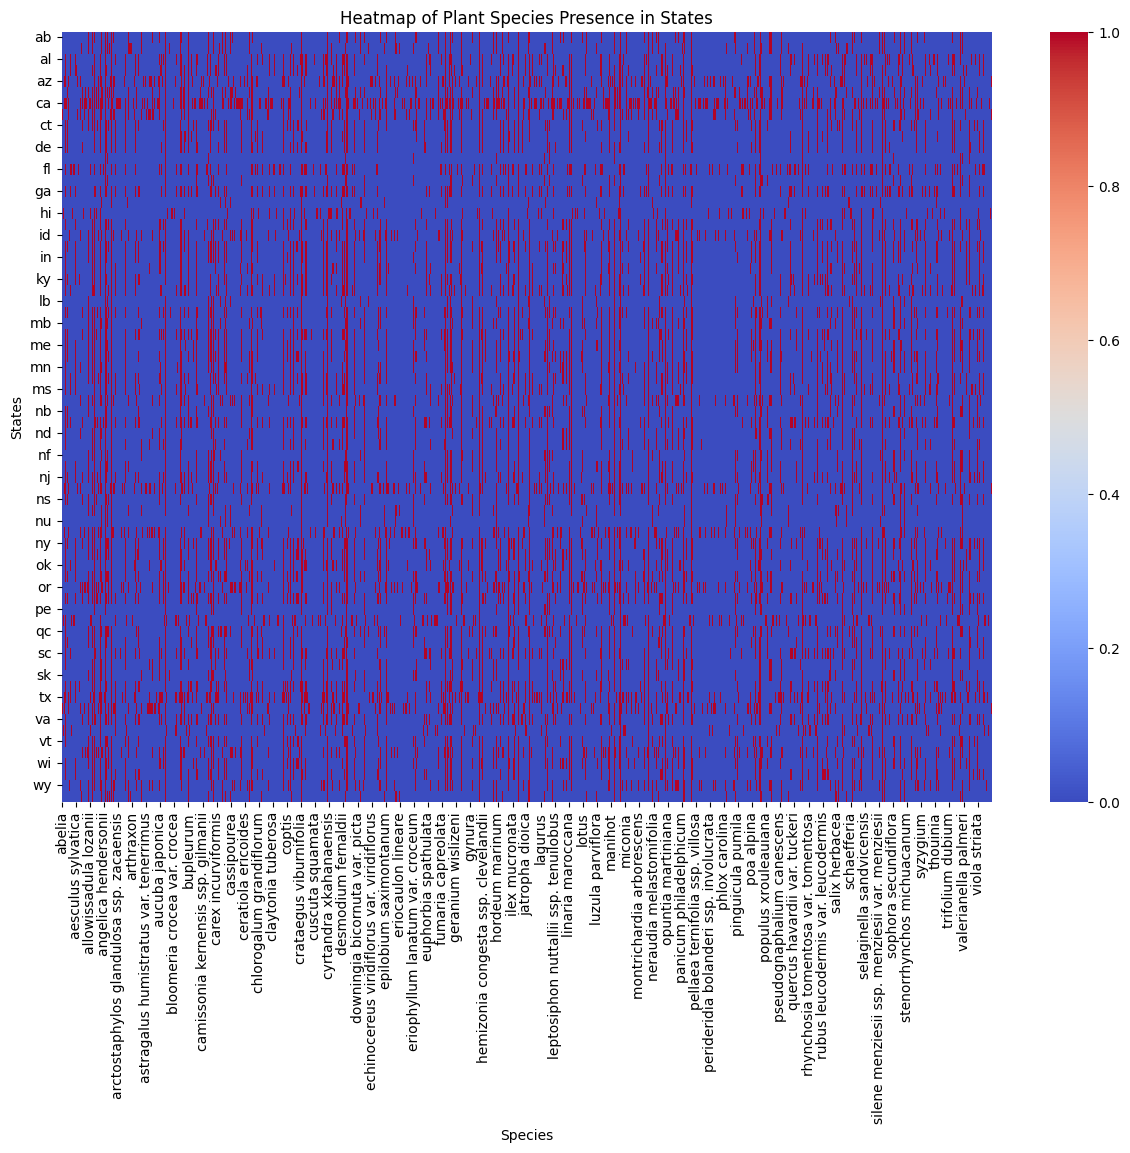

In [ ]:
# 1. Biểu đồ phân bố các loài thực vật theo các bang (Distribution of plant species across regions)
species_per_state = df.sum(axis=0)
species_per_state_sorted = species_per_state.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=species_per_state_sorted.index, y=species_per_state_sorted.values)
plt.xticks(rotation=90)
plt.title("Distribution of Plant Species Across States")
plt.xlabel("States")
plt.ylabel("Number of Plant Species")
plt.tight_layout()
plt.show()

# 2. Biểu đồ các bang có số lượng loài thực vật nhiều nhất (States with the most plant species)
top_states = species_per_state_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title("Top 10 States with the Most Plant Species")
plt.xlabel("States")
plt.ylabel("Number of Plant Species")
plt.show()

# 3. Heatmap biểu diễn mối quan hệ giữa các loài và các bang (Heatmap of species presence in states)
plt.figure(figsize=(15, 10))
sns.heatmap(df.T, cmap="coolwarm", cbar=True)
plt.title("Heatmap of Plant Species Presence in States")
plt.xlabel("Species")
plt.ylabel("States")
plt.show()

In [ ]:
from collections import defaultdict
# Chia dữ liệu thành các tập con dựa trên số lượng bang
tap_con = defaultdict(list)
for item in cleaned_data:
    num_states = len(item[1:])  # Đếm số lượng bang mà loài thực vật xuất hiện
    tap_con[num_states].append(item)

# In số lượng rows và số chiều (bang) trên mỗi tập con
for num_states, species_list in tap_con.items():
    print(f"Tập con với {num_states} bang: {len(species_list)} rows")

Tập con với 2 bang: 4874 rows
Tập con với 15 bang: 322 rows
Tập con với 14 bang: 333 rows
Tập con với 47 bang: 64 rows
Tập con với 1 bang: 11566 rows
Tập con với 5 bang: 1366 rows
Tập con với 29 bang: 159 rows
Tập con với 11 bang: 503 rows
Tập con với 10 bang: 562 rows
Tập con với 3 bang: 2954 rows
Tập con với 4 bang: 2107 rows
Tập con với 6 bang: 1094 rows
Tập con với 16 bang: 284 rows
Tập con với 18 bang: 241 rows
Tập con với 13 bang: 421 rows
Tập con với 7 bang: 859 rows
Tập con với 61 bang: 52 rows
Tập con với 58 bang: 45 rows
Tập con với 21 bang: 200 rows
Tập con với 9 bang: 655 rows
Tập con với 12 bang: 421 rows
Tập con với 33 bang: 148 rows
Tập con với 27 bang: 190 rows
Tập con với 41 bang: 83 rows
Tập con với 34 bang: 147 rows
Tập con với 20 bang: 207 rows
Tập con với 63 bang: 39 rows
Tập con với 8 bang: 744 rows
Tập con với 19 bang: 249 rows
Tập con với 59 bang: 39 rows
Tập con với 52 bang: 68 rows
Tập con với 24 bang: 195 rows
Tập con với 30 bang: 146 rows
Tập con với 26 bang

Shape of data after PCA: (34781, 30)


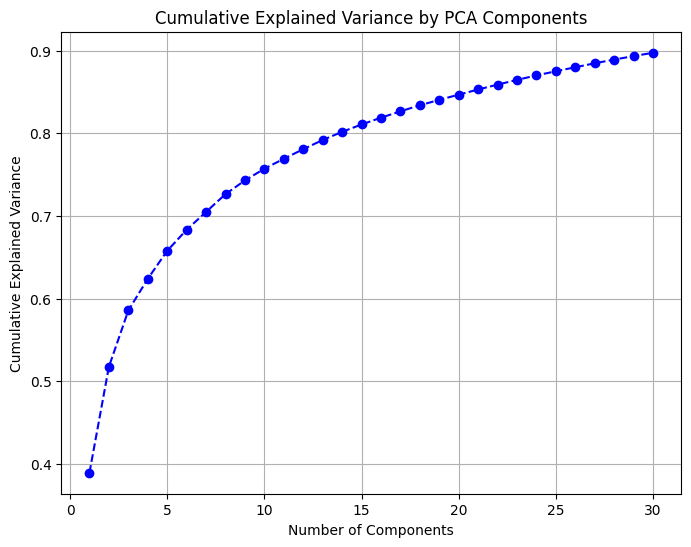

In [ ]:
# Xử Lý Dữ Liệu Phân Loại
# Vì các thuộc tính đều là phân loại, chúng ta cần chuyển đổi chúng thành dạng số để có thể áp dụng các thuật toán phân cụm. Một cách đơn giản là sử dụng One-Hot Encoding. Tuy nhiên, với 70 thuộc tính, việc này có thể tạo ra ma trận dữ liệu rất lớn. Để giảm chiều, chúng ta có thể áp dụng Trích Xuất Đặc Trưng (Feature Extraction) hoặc Giảm Chiều (Dimensionality Reduction) sau khi mã hóa.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np


# Giảm chiều dữ liệu với PCA
pca = PCA(n_components=30, random_state=42)
# X = pca.fit_transform(df_tmp)
X = pca.fit_transform(df)
print("Shape of data after PCA:", X.shape)

# Hiển thị tỷ lệ phương sai tích lũy để xem số lượng thành phần cần thiết
explained_variance = np.cumsum(pca.explained_variance_ratio_)
# print("Explained variance ratio:", explained_variance)

# Vẽ biểu đồ tỷ lệ phương sai tích lũy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Áp dụng preprocessing
# X = pipeline.fit_transform(df)

# print("Shape of data after preprocessing:", X.shape)

# Lưu ý: Bạn có thể điều chỉnh n_components trong PCA tùy thuộc vào tài nguyên máy tính và yêu cầu của bài toán.



K=2, WCSS=149422.24804216303, Silhouette Score=0.5382729982841854
K=3, WCSS=133851.10634352974, Silhouette Score=0.4813536791883862
K=4, WCSS=119898.91686407986, Silhouette Score=0.3664264840546285
K=5, WCSS=110089.36152547594, Silhouette Score=0.3592711110662796
K=6, WCSS=103712.7115576469, Silhouette Score=0.3468252338410616
K=7, WCSS=100429.47719485869, Silhouette Score=0.3233266480498991
K=8, WCSS=93563.22251797361, Silhouette Score=0.18779151750857903
K=9, WCSS=90342.09487994449, Silhouette Score=0.18783280734501231


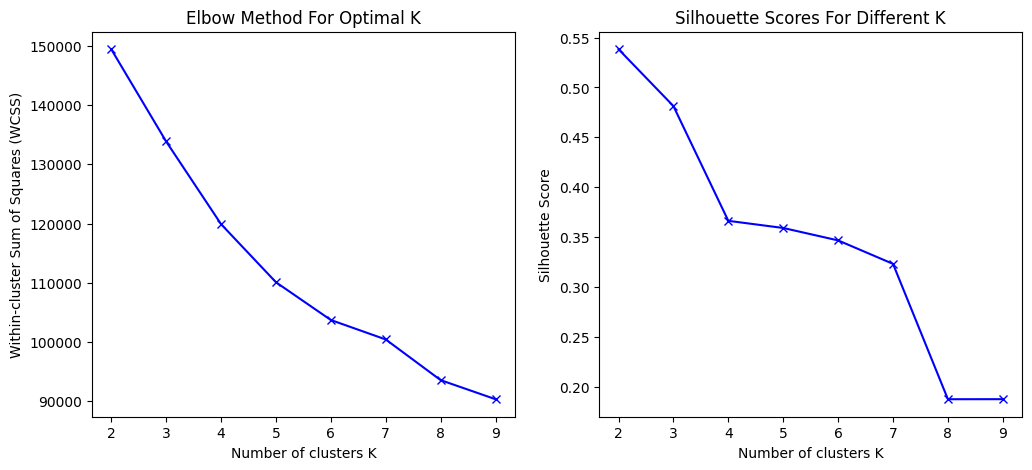

In [ ]:
# Áp Dụng Các Mô Hình Phân Cụm
# 2.1. K-Means Clustering
# K-Means là một trong những thuật toán phân cụm phổ biến nhất. Tuy nhiên, bạn cần xác định số cụm (K) trước. Một cách để chọn K là sử dụng phương pháp Elbow Method với Silhouette Score.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns

# Tìm số cụm K tối ưu bằng phương pháp Elbow và Silhouette
range_k = range(2,10)
wcss = []
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1000) # Sử dụng MiniBatch K-Means để tăng tốc độ phân cụm
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)
    print(f'K={k}, WCSS={kmeans.inertia_}, Silhouette Score={silhouette}')



# Vẽ biểu đồ Elbow
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_k, wcss, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')

# Vẽ biểu đồ Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_k, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different K')

plt.show()




K-Means Silhouette Score with K=9: 0.18783280734501231


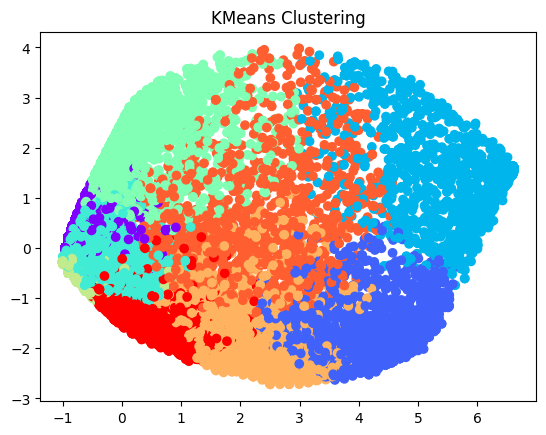

In [ ]:
# Giả sử K tối ưu là x dựa trên biểu đồ
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
kmeans_clusters = kmeans.fit_predict(X)
kmeans_labels = kmeans.labels_

# Đánh giá kết quả phân cụm
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f'K-Means Silhouette Score with K={optimal_k}: {kmeans_silhouette}')
# Phân cụm có sự rõ ràng nhất với Silhouette Score cao nhất, nhưng WCSS vẫn cao, cho thấy các cụm chưa chặt chẽ lắm.

# Vẽ biểu đồ kết quả phân cụm
plt.scatter(x=X[:, 0],y=X[:, 1], c=kmeans_clusters, cmap='rainbow')
# sns.scatterplot(x=X[:, 0],y=X[:, 1], hue=kmeans_clusters, palette='Set1', s=50)
plt.title('KMeans Clustering')
plt.show()

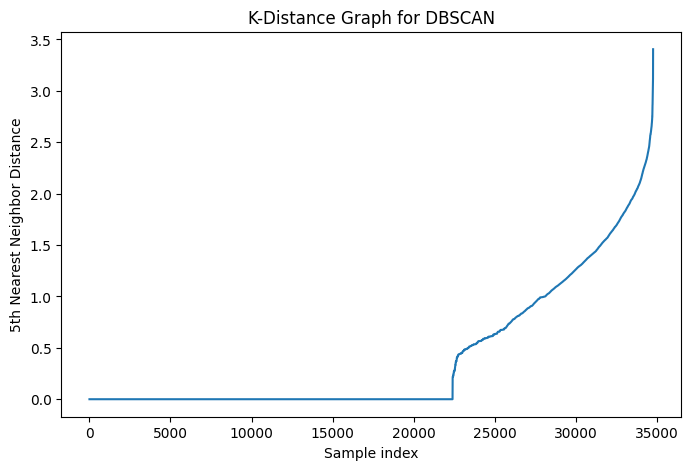

DBSCAN Silhouette Score: 0.5723490306297664


In [ ]:
# 2.2. DBSCAN
# DBSCAN là thuật toán phân cụm dựa trên mật độ, không yêu cầu xác định số cụm trước và có khả năng phát hiện nhiễu. Tuy nhiên, nó yêu cầu chọn các tham số eps và min_samples một cách cẩn thận.

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Chọn tham số eps và min_samples
# Một cách đơn giản để chọn eps là sử dụng biểu đồ K-distance

from sklearn.neighbors import NearestNeighbors

# Tìm 5 nearest neighbors
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sắp xếp lại các khoảng cách
distances = np.sort(distances[:,4], axis=0)

# Vẽ biểu đồ K-distance
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Sample index')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('K-Distance Graph for DBSCAN')
plt.show()

# Dựa vào biểu đồ, chọn eps, ví dụ: 0.6 ~ 0.7
dbscan_eps = 0.6
# Chọn min_samples, ví dụ: 5 (có thể tăng lên 6 hoặc 7 nếu bạn muốn các cụm chặt chẽ hơn)
dbscan_min_samples = 5  # Số lượng điểm tối thiểu để hình thành một cụm.

dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(X)

# Đánh giá kết quả phân cụm
# Loại bỏ các điểm nhiễu (label = -1) khi tính Silhouette Score
mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1 and mask.sum() > 1:
    dbscan_silhouette = silhouette_score(X[mask], dbscan_labels[mask])
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
else:
    print('DBSCAN không tạo ra cụm hợp lệ để đánh giá Silhouette Score.')
# Lưu ý:

# Biểu đồ K-distance giúp bạn xác định giá trị eps phù hợp bằng cách tìm điểm gãy (elbow) trong đồ thị.
# DBSCAN có thể không hoạt động tốt với dữ liệu có mật độ không đồng nhất hoặc với dữ liệu có nhiều chiều. Do đó, việc giảm chiều với PCA trước khi áp dụng DBSCAN là cần thiết.


In [ ]:
# Agglomerative Clustering (Phân cụm phân cấp)
# Import thư viện
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Danh sách các số cụm để thử nghiệm
n_clusters_list = [2, 3, 4, 5, 6,7]

# Vòng lặp qua các số cụm và đánh giá kết quả
for n_clusters in n_clusters_list:
    # Thực hiện Agglomerative Clustering với n_clusters cụm
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clustering.fit_predict(X)

    # Đánh giá với Silhouette Score
    agg_silhouette = silhouette_score(X, agg_labels)

    # In kết quả cho từng số cụm
    print(f'Agglomerative Clustering với {n_clusters} cụm - Silhouette Score: {agg_silhouette}')



Agglomerative Clustering với 2 cụm - Silhouette Score: 0.5168888743361941
Agglomerative Clustering với 3 cụm - Silhouette Score: 0.34363205572988714
Agglomerative Clustering với 4 cụm - Silhouette Score: 0.34922317917707824
Agglomerative Clustering với 5 cụm - Silhouette Score: 0.3501819065680398
Agglomerative Clustering với 6 cụm - Silhouette Score: 0.3542437858286845
Agglomerative Clustering với 7 cụm - Silhouette Score: 0.14837690028240128


In [ ]:
# hierarchical clustering

In [ ]:

from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Learning rate scheduler
# scheduler: Hàm giảm learning rate sau mỗi epoch.
# Điều này giúp giảm tốc độ học khi mô hình tiếp cận gần điểm hội tụ, giúp tránh cập nhật quá lớn.
def scheduler(epoch, lr):
    return lr * 0.9  # Reduce learning rate by 10% after each epoch

# Early stopping to prevent overfitting
# EarlyStopping: Theo dõi loss của mô hình và dừng huấn luyện nếu loss không cải thiện sau 10 epoch (để tránh overfitting).
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)


# Xây dựng Autoencoder với nhiều tầng và regularization
# Encoder: Nén dữ liệu đầu vào thành một không gian tiềm ẩn (latent space).
# Decoder: Tái tạo lại dữ liệu từ không gian tiềm ẩn.
input_dim = X.shape[1]
encoding_dim = 20  # Giảm xuống không gian tiềm ẩn 16 chiều 8 ~ 12 ~ 20

input_layer = Input(shape=(input_dim,))
# Encoder layers
encoder = Dense(64, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
encoder = BatchNormalization()(encoder)
encoder = Dropout(0.2)(encoder)

encoder = Dense(32, activation="relu", kernel_regularizer=l2(0.001))(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dropout(0.2)(encoder)

encoder = Dense(encoding_dim, activation="relu", kernel_regularizer=l2(0.001))(encoder)

# Decoder layers
decoder = Dense(32, activation="relu")(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dropout(0.2)(decoder)

decoder = Dense(64, activation="relu")(decoder)
decoder = BatchNormalization()(decoder)
decoder = Dropout(0.2)(decoder)

decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Autoencoder model
# Model(inputs=input_layer, outputs=decoder): Tạo mô hình Autoencoder với đầu vào và đầu ra tương ứng.
# Compile: Sử dụng thuật toán Adam để tối ưu hóa và mean_squared_error (MSE) làm hàm mất mát.
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

# Huấn luyện Autoencoder
# fit(X, X): Huấn luyện mô hình với dữ liệu đầu vào và dữ liệu mục tiêu đều là X, bởi vì Autoencoder cố gắng tái tạo lại dữ liệu đầu vào.
autoencoder.fit(X, X, epochs=100, batch_size=256, callbacks=[early_stopping, lr_scheduler])

# Trích xuất không gian tiềm ẩn (encoding)
# Sau khi huấn luyện, trích xuất phần mã hóa (encoder) của dữ liệu đầu vào X để có được biểu diễn không gian tiềm ẩn (X_encoded).
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_encoded = encoder_model.predict(X)

# Thực hiện phân cụm trên không gian tiềm ẩn bằng K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
deep_cluster_labels = kmeans.fit_predict(X_encoded)

# Đánh giá với Silhouette Score
deep_cluster_silhouette = silhouette_score(X, deep_cluster_labels)
print(f'Autoencoder + K-Means Silhouette Score: {deep_cluster_silhouette}')

# sử dụng Autoencoder để nén dữ liệu thành một không gian tiềm ẩn có kích thước nhỏ hơn. Sau đó, sử dụng K-Means để phân cụm trên không gian này và đánh giá chất lượng phân cụm bằng Silhouette Score.


Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.5572 - learning_rate: 9.0000e-04
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3151 - learning_rate: 8.1000e-04
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2200 - learning_rate: 7.2900e-04
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1929 - learning_rate: 6.5610e-04
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1791 - learning_rate: 5.9049e-04
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1726 - learning_rate: 5.3144e-04
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1647 - learning_rate: 4.7830e-04
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1646 - learning_rate: 4.3047e-04
Epoch 9/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1613 - learning_rate: 3.8742e-04
Epoch 10/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1579 - learning_rate: 3.4868e-04
Epoch 11/100
136/136 ━━━━━━━━━━━━━━━━━

In [ ]:
# 3. Tổng Kết và Đề Xuất
# 3.1. Kết Quả Phân Cụm
# Sau khi áp dụng hai mô hình phân cụm, bạn có thể so sánh các kết quả dựa trên Silhouette Score hoặc các chỉ số đánh giá khác. K-Means thường hiệu quả với dữ liệu có cụm rõ ràng và hình cầu, trong khi DBSCAN phù hợp hơn với dữ liệu có mật độ không đồng nhất và có khả năng phát hiện nhiễu.

# 3.2. Một Số Gợi Ý Khác
# Giảm Chiều Nâng Cao: Thay vì chỉ sử dụng PCA, bạn có thể thử các kỹ thuật giảm chiều khác như t-SNE hoặc UMAP để giữ được cấu trúc phân cụm tốt hơn.

# Sử Dụng Các Thuật Toán Phân Cụm Khác: Ngoài K-Means và DBSCAN, bạn có thể thử các thuật toán khác như Agglomerative Clustering, Gaussian Mixture Models (GMM) hoặc Spectral Clustering.

# Tiền Xử Lý Dữ Liệu Khác: Kiểm tra và loại bỏ các thuộc tính không cần thiết hoặc có tầm quan trọng thấp để cải thiện hiệu quả và độ chính xác của mô hình.

# Parallel Computing: Với dữ liệu lớn như 34,781 mẫu và 70 thuộc tính, hãy cân nhắc sử dụng các phương pháp tính toán song song hoặc chạy trên các máy có cấu hình mạnh để giảm thời gian xử lý.

# 3.3. Lưu Ý Về Tài Nguyên Máy Tính
# Việc áp dụng One-Hot Encoding trên 70 thuộc tính có thể dẫn đến ma trận dữ liệu rất lớn, đặc biệt nếu các thuộc tính có nhiều giá trị phân loại. Bạn cần đảm bảo rằng máy tính của bạn có đủ bộ nhớ RAM để xử lý. Nếu gặp vấn đề về bộ nhớ, bạn có thể xem xét các phương pháp mã hóa khác như Feature Hashing hoặc Embeddings.

# 4. Hoàn Thiện Dự Án
# Sau khi thực hiện phân cụm, bạn có thể:

# Phân Tích Các Cụm: Xem xét các đặc trưng của từng cụm để hiểu rõ hơn về cấu trúc dữ liệu.

# Trực Quan Hóa: Sử dụng các kỹ thuật giảm chiều như PCA, t-SNE hoặc UMAP để trực quan hóa các cụm trong không gian 2D hoặc 3D.

# Triển Khai Các Phương Pháp Đánh Giá Khác: Nếu có sẵn nhãn dữ liệu, bạn có thể sử dụng các chỉ số ngoại tại như Adjusted Rand Index (ARI) hoặc Normalized Mutual Information (NMI) để đánh giá chất lượng phân cụm.

# Chúc bạn thành công với dự án phân cụm của mình! Nếu có bất kỳ câu hỏi nào thêm, đừng ngần ngại hỏi tiếp nhé.